[View in Colaboratory](https://colab.research.google.com/github/sdevika/MLBootCamp/blob/master/lab1_partB_new.ipynb)

## Lab 1: Part 2: Understanding regularized linear regression
In this part, you will play with regularized linear regression (L1 and L2) and use it to study models with different bias-variance properties.

In [19]:
import random
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score

# This is a bit of magic to make matplotlib figures appear inline in the notebook
# rather than in a new window.
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Regularized Linear Regression cost function and gradient
Below is an implementation of the loss function and gradient of the
loss function for regularized linear regression on multiple predictors. 
Regularized linear regression has the following cost function:
$$J(\theta) = \frac{1}{2m} \left( \sum_{i=1}^{m} {( y^{(i)} - h_\theta(x^{(i)})}^2\right) + \frac{\lambda}{2m}\left( \sum_{j=1}^{n} {\theta_j}^2 \right) $$
where $\lambda$ is a regularization parameter which controls the degree of regularization
(thus, help preventing overfitting). The regularization term puts
a penalty on the overall cost $J(\theta)$. As the magnitudes of the model parameters $\theta_j$ increase, the penalty increases as well. Note that you should not regularize the $\theta_0$ term.  Note the vectorized code.

Correspondingly, the partial derivative of the regularized linear regression  cost function
with respect to  $\theta_j$ is defined as:
\begin{eqnarray*}
\frac{\partial J(\theta)}{\partial \theta_0} & = & \frac{1}{m} \sum_{i=1}^{m} (h_\theta(x^{(i)}) - y^{(i)}){x_j}^{(i)} \\
\frac{\partial J(\theta)}{\partial \theta_j} & = & \left(\frac{1}{m} \sum_{i=1}^{m} (h_\theta(x^{(i)}) - y^{(i)} ){x_j}^{(i)}\right) + \frac{\lambda}{m}{\theta_j} \; \; \; \mbox{ for }j \geq 1\\
\end{eqnarray*}

### Regularized linear regression: an example
In this problem, you will use regularized linear regression
to predict the amount of water flowing out of a dam using the change
of water level in a reservoir. We will begin by visualizing the dataset containing historical records on the
change in the water level $x$, and the amount of water $y$, flowing out of the dam.
This dataset is divided into three parts:
- A training set that you will use to learn the model:  X,  y.
- A validation set for determining the regularization parameter: Xval, yval.
- A test set for evaluating the performance of your model:  Xtest, ytest. These are unseen examples that were not used during the training of the model.

Run the cell below and it  will plot the training data. 

Cloning into 'MLBootCamp'...
remote: Counting objects: 48, done.
remote: Compressing objects: 100% (45/45), done.
remote: Total 48 (delta 13), reused 3 (delta 0), pack-reused 0
Unpacking objects: 100% (48/48), done.
Loading and Visualizing Data ...


Text(0,0.5,u'Water flowing out of the dam (y)')

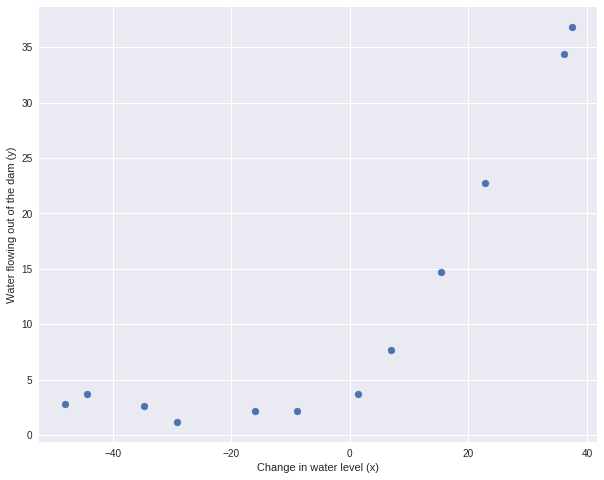

In [7]:
#!git clone https://github.com/sdevika/MLBootCamp.git
  
import numpy as np
import matplotlib.pyplot as plt
import scipy.io

########################################################################
## =========== Part 1: Loading and Visualizing Data ===================#
########################################################################
# Load Training Data

def load_mat(fname):
  d = scipy.io.loadmat(fname)
  X = d['X']
  y = d['y']
  Xval = d['Xval']
  yval = d['yval']
  Xtest = d['Xtest']
  ytest = d['ytest']
  return X,y,Xtest,ytest,Xval,yval

print 'Loading and Visualizing Data ...'

X, y, Xtest, ytest, Xval, yval = load_mat('MLBootCamp/ex2data1.mat')
X,y,Xtest,ytest,Xval,yval = np.hstack(X), np.hstack(y),np.hstack(Xtest), np.hstack(ytest),np.hstack(Xval), np.hstack(yval)

# Plot training data

plt.scatter(X,y)
plt.xlabel('Change in water level (x)')
plt.ylabel('Water flowing out of the dam (y)')


### Building a Regularized Linear Regression model

The cell below runs sklearn's regularized L2 linear regression model to compute the optimal value
of $\theta$. 

The best fit line plotted by the script  tells us that the model is
not a good fit to the data because the data is non-linear. While
visualizing the best fit as shown is one possible way to debug your learning
algorithm, it is not always easy to visualize the data and model. In the next
cell, you will implement a function to generate learning curves that can
help you debug your learning algorithm even if it is not easy to visualize the
data.

Coefficients are: [0.36777923] 13.08790351086908


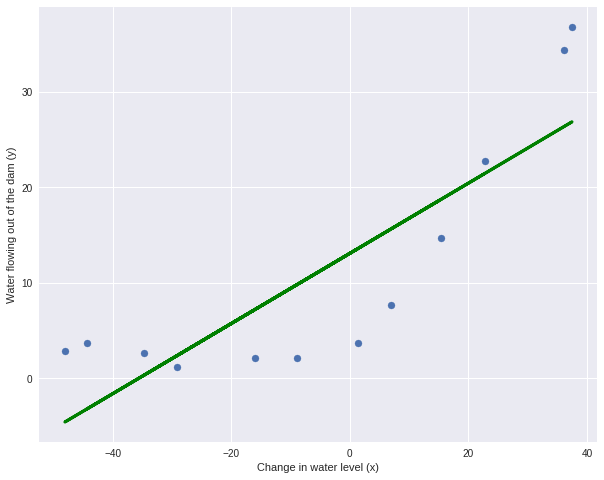

In [8]:
from sklearn import linear_model

lr = linear_model.Ridge(alpha=0.0)
lr.fit(X.reshape(-1,1),y)

print "Coefficients are:", lr.coef_, lr.intercept_
# plot fit over data and show it 
plt.scatter(X,y)
plt.xlabel('Change in water level (x)')
plt.ylabel('Water flowing out of the dam (y)')
plt.plot(X,lr.predict(X.reshape(-1,1)),'g-',linewidth=3)

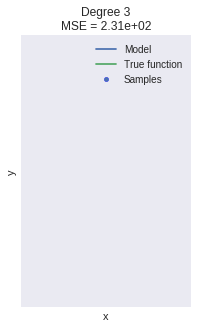

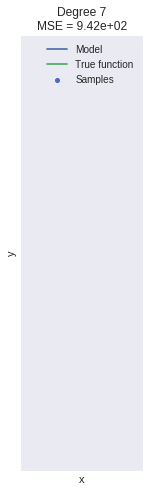

ValueError: ignored

In [27]:
# build a richer model with polynomial features
plt.figure(figsize=(14, 5))
degrees = [1,3,5,7]
for d in degrees:
  ax = plt.subplot(1, len(degrees), d + 1)
  plt.setp(ax, xticks=(), yticks=())
  polynomial_features = PolynomialFeatures(degree=degrees[d])
  ridge = linear_model.Ridge()
  pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("ridge", ridge)])
  pipeline.fit(X.reshape(-1,1), y)

  # Evaluate the models on test set
  ypred = pipeline.predict(Xtest.reshape(-1,1))
  sqerror = np.dot((ypred-ytest).T,(ypred-ytest) )                        

    
  plt.plot(Xtest, ypred, label="Model")
  plt.plot(Xtest, ytest, label="True function")
  plt.scatter(X, y, edgecolor='b', s=20, label="Samples")
  plt.xlabel("x")
  plt.ylabel("y")
  plt.xlim((0, 1))
  plt.ylim((-2, 2))
  plt.legend(loc="best")
  plt.title("Degree {}\nMSE = {:.2e}".format(degrees[d], sqerror))
  plt.show()

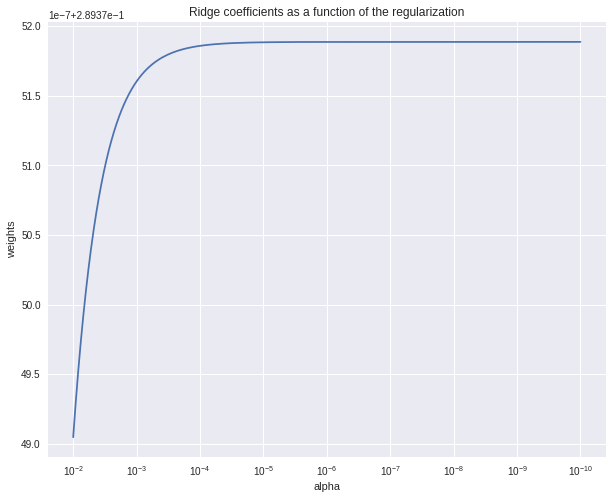

In [10]:
n_alphas = 200
alphas = np.logspace(-10, -2, n_alphas)

coefs = []
for a in alphas:
    ridge = linear_model.Ridge(alpha=a, fit_intercept=False)
    ridge.fit(X.reshape(-1,1), y)
    coefs.append(ridge.coef_)

# Display results

ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')
plt.show()